# Resumen Ejectivo 💼

Con el principal objectivo de predecir la demanda de energia electrica diaria en España se ha usando, como base, el consumo de real de los ultimos 4 anos (2015 -2018).<br>

Para complementar estes dados se han añadidos variables exogenas que impactan, en un principio, en el consumo electrico:<br>
* Festivos nacionales<br>
* Temperatura real del dia anterior (media españa)<br>

Se han probado 3 modelos de prediccion diferentes, cada uno con sus variantes.<br>
Para calcular la precision, se entrenó el modelo con una parte de los datos (3 primeros años) y se predijo el ultimo año. Este ultimo año, se ha comparado con la demanda real.<br>
El mejor modelo es el que mas se acerca al valor real, es decir, el que tiene menos error.<br>

El modelo elegido, tiene un error de 4,08%. (Boosting Standard)<br>

A continuacion se presenta el grafico de los ultimos 30 dias con la comparacion entre el real (Energy Demand Spain) y la preciccion (Energy Demand Spain Pred)<br>


In [180]:
px.line(df_boosting.tail(31), x = 'Datetime', y = [ 'Energy_Demand_Spain', 'Energy_Demand_Spain_pred'],title='Ultimos 30 dias, real vs Prediccion')

Los proximos pasos para tener una prediccion continua, seria automatizar el flujo de datos de la demanda real, es decir que al terminar el dia, tengamos ese dato en nuestros sistemas y lo podamos aplicar al nuestro modelo de prediccion. (la temperatura y festivos ya estan automatizados).<br>

Para mejorar el 4,08% se podria hacere el modelo por region, ya que las variables exogenas pueden ser muy diferentes (festivos y temperatura).<br>
También seria posible añadir ams variables exogenas (temperatura minima y maxima), coste de la energia, produccion de energia local (por ejemplo fotovoltaica privada),industrias por region etc...

Tambien seria util crear una herramienta de control (dashboard) para poder monitorar el error , y re-entrenar el modelo cuando el error sea superior a un limite (a definir por la compañia).

el consumo que se preve para "mañana" dia 01-01-2019 es:

In [181]:
display(prediccion)

index   Datetime  Energia_Predecida
0   1461 2019-01-01      648325.014513

# Informe de Negocio 📊

#### <font color='Green'> Analisis Descriptivo </b> </font>

De los datos suministrados por la compañia: Energia consumida por fecha en bloques de 1 hora (UTC) a nivel Nacional, ademas de convertirlo en horario local peninsular, se añadió variables que dependen de la fecha:<br>
* Dia del Año<br>
* Año <br>
* Mes <br>
* Dia del Mes <br>
* Dia de la semana <br>
* Semana del Año <br>
* Mes y Año <br>

Estas variables ayudaran el modelo en encontrar patrones, ya que es mas facil entontrar una comparacion de Domingo con Domingo que dias sueltos.<br>
Tambien se añadieron varias variables exogenas:

* Los festivos : se considera que hay un cambio en el consumo de energia: La industria pára, y la poblacion pasa mas tiempo en casa, por lo que se cambia el consumo industrial por el consumo residencial. Al no importar el tipo de festivo, se ha creado unicamente una marca para saber si es festivo o no. <br>
Solo Estan considerados los festivos a nivel nacional, ya que no tenemos la energia separada or Regiones.

* La temperatura: Se ha creado un proceso automatizado para recuperar la temperatura real del dia anterior. Este dato lo tenemos por estacion meterologica, que estan agrupadas por region. Para poder juntarla a nuestros datos, se ha convertido en temperatura media nacional.<br>
Como el objectivo es que predecir la energia a un dia vista, no sabremos la temperatura real del dia a predecir, por lo tanto se tomara la temperatura del dia anterior.

podemos ver la descipcion de todas las variables:


In [182]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1461   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Energy_Demand_Spain     │   0 │      0 │  690000 │  67000 │  340000 │  650000 │  740000 │  850000 │   ▂▆█▂ │  │
│ │ year                    │   0 │      0 │    2000 │    1.1 │    2000 │    2000 │    2000 │    2000 │ █ █ ██ │  │
│ │ month                   │   0 │      0 │     6.5 │    3.4 │       1 │       4 │      10 │      12 │ ██████ │  │
│ │ week_day                │   0 │      0 │       3 │      2 │       0 │       1 │       5 │       6 │ ▄▄▄▄▄█ │  │
│ │ day                     │   0 │      0 │      16 │    8.8 │       1 │       8 │      23 │      31 │ ▇▇▇▇▇█ │  │
│ │ is_holiday              │   0 │      0 │    0.03 │   0.17 │       0 │       0 │       0 │       1 │   █    │  │
│ │ temp_med                │   0 │      0 │      16 │    5.9 │     3.5 │      11 │      21 │      28 │ ▂█▆▆▆▄ │  │
│ │ temp_med_dia_anterio    │   1 │  0.068 │      16 │    5.9 │     3.5 │      11 │      21 │      28 │ ▂█▆▆▆▄ │  │
│ └─────────────────────────┴─────┴────────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Datetime               │      0 │         0 │     2015-01-01      │     2018-12-31      │ D                │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ year_day                  │       0 │          0 │                            1 │                     1500 │  │
│ │ week                      │       0 │          0 │  

El error de la temperatura es de: 

In [183]:
temp_error = pd.DataFrame(
{'MAPE (%)' : [round(mean_absolute_percentage_error(df['temp_med'][1:],df['temp_med_dia_anterior'][1:]),5)*100 ],
  'MAE (ºC)' : [round(mean_absolute_error(df['temp_med'][1:],df['temp_med_dia_anterior'][1:] ),3)]})
display(temp_error)  

MAPE (%)  MAE (ºC)
0     6.187     0.818

Lo Podemos ver visualmente:

In [184]:
px.line(df.tail(730),x='Datetime',y=['temp_med' , 'temp_med_dia_anterior'], title='Temperatura de los ultimos 2 años')

In [185]:
px.line(df.tail(30),x='Datetime',y=['temp_med' , 'temp_med_dia_anterior'], title='Temperatura de los ultimos 30 dias')



Por lo que se puede considerar que menos de un grado no es demasiado significativo para este tipo de prediccion.

#### <font color='Green'> Comparacion resultados de Modelo </b> </font>

Se han entrenado 3 modelos (Prophet, Bostting,ARIMA), y dentro de cada uno se han ido haciendo variacinoes par encontrar el mejor resultado posible. 

Podemos observar de una forma muy grafica, las predicciones de todos los modelos, con exepcion del 'ARIMA_prediction_dynamic' ya que los valores no son comparable: 

In [186]:
px.line(total_pred.tail(30),x='Datetime',y=['Energy_Demand_Spain','BOOSTING_tendencia','BOOSTING_standard','PROPHET','ARIMA_prediction_step_refit','ARIMA_prediction_step'] ,title='Prediccion Vs real todos modelos de los ultimos 30 dias')

In [187]:
px.bar(df_errores,x='Modelo',y='MAPE',title='Error medio absoluto (%)')

#### <font color='Green'> Seleccion del modelo </b> </font>
Como podemos observar por el grafico anterior, el modelo con menos error, es decir el que tiene mejor prediccion de la energia electrica, es el Boosting Standard y el Boostin con tendencia (mismo valor), con un 4,08% de error medio.  Se optó por el Boosting stnader porque es mas rapido y tiene menos calculos.
Si la demanda de energia aumenta o disminuye considerablemente, y se prenuncia una tendencia significativa, se recomenta pasar al modelo de Boostin_tendencia.<br>

Para Entrenar el modelo con mejor resultado, se han añadido variables que son su mismo valor en el pasado, un pequeño "retraso" (lag) de esas cifras.
Se han añadido retraso de 1,2,3,4,5,6,7,30,180,360 dias, ademas de las que ya teniamos. Con base en los patrones, el modelo escoge una u otras para hacer la prediccion. En nuestro caso, esta es la importancia de las variables:  

feature_importance_b = m_ener_b.feature_importances_
sorted_idx = np.argsort(feature_importance_b)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance_b[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(test_X_b.columns)[sorted_idx])
plt.title('Feature Importance')

Para poder mejorar el modelo, podriamos tener la demanda de energia electria por region, asi poder tener la temperatura y los festivos por region. Añadir mas metricas exogenas, que puedan tener mayor sensibilidad al consumo industria y residencia, por ejemplo el PIB del sector industrial por region.

También podria mejorar el modelos añadiendo mas variables exogenas (temperatura minima y maxima), coste de la energia, produccion de energia local (por ejemplo fotovoltaica privada),industrias por region etc... 


# Reporte Científico 👩🏻‍💻

1000 palabras máx <br>
Incluye todo el código de cierta relevancia.<br>
Tiene que estar ordenado secuencialmente, pero no hace falta que siga la historia del Informe de Negocio. <br>
El resto de puede estar en apendices <br>

Para el codigo, me gustarias hablar sobre lo que tiene mas relevancia, o que me mas tiempo tardé en hacerlo o inmovaciones, que apesar de sencillas me parecen importantes 

**Parte 1:** <br>
Usar la libreria SKIMPY , permite hacer un "describe" mucho mas user friendly, de varias que he probado (algunas mas completas), esta fue la que mas me gusto, ya que no hace falta generar un HTML, es rapida y se lé muy bien

``` PYTHON
from skimpy import skim
```

**Parte 2**<br>
Se han usado funciones siempre que el mismo codigo si usa mas que una vez
- Para añadir variables de tiempo (metricas_tiempo)
- Para añadir festivos(add_festivos)
- Para añadir LAG (lag)
- Para mostros los errores(error)

**Parte 3**<br>
Se ha usado una libreria de tiempo para recuperar los datos por dia de todas las regiones y cada una de las estaciones. Una libreria compleja, con comandos prorpios, que tomo mucho tiempo en sacar algo logico y aceptable

```PYTHON
import meteostat as m

stations= m.Stations()
stations =stations.region(country='ES')
station_es=[]
station_es=stations.fetch()
station_es=station_es.reset_index()

start = str(df.Datetime.dt.date.min())
end = str(df.Datetime.dt.date.max())+ pd.Timedelta(days=1) #añado 1 dia para que el shift tengamos la fecha destino en profet)

temp = pd.DataFrame()
datos_es=pd.DataFrame()

for x in station_es['id']:
    datos = m.Daily(x, start, end)
    datos_es=datos.fetch().reset_index()
    temp = temp.append(datos_es)

#Fichero para pasar los datos a la clase
#temp.to_csv("datos_tiempo_tiago.csv", index=False)

temp=temp[['time','tavg']].dropna()
temp=temp.groupby(by=temp['time']).mean().round(2).reset_index()
temp.columns=['Datetime','temp_med']
temp['Datetime']=pd.to_datetime(temp['Datetime'])
temp 
```

el dia adicional (pd.Timedelta(days=1)) desaparecerá , porque el shift pasara la fecha de dia anterior (31.12.2018 al dia siguiente:01.01.2019 )
Antes de crear mi tabla temp, he hecho una extraccion de los datos en bruto y los pasé en CSV a la clase, para quien quisiera usarlos

**Parte 4**<br>
Apesar de parecer sencillo, me costo mucho añadir la variable exogena a Prophet, por lo que me gustaria darle una mension especial

**Parte 5**<br>
el entreno, decomposicion de modelos, comparacion, decorrio dentro de la normalidad, con varios intentos, varios parametros, varias variables de LAG , hasta que se dejo con la opcion con menos error

**Parte 6** <br>
En la comparacion de modelos, he creado compracions visuales con todos las prediccion y graficos con los errores de todos los modelos

**Parte 7**<br>
añadir un dia en el futuro (lo pedido era predecir el dia siguiente) y usar las funciones creadas para a ese dia juntarle las variables (tiempo,festivo, tiempo, lag....) y predecir el dia 01/01/2019


```PYTHON
#Añadir el dia a predecir, añadir todas las variables PRESENTES
dia_a_predecir = {'Datetime': '2019-01-01'}

# agrega la nueva línea al dataframe utilizando el método append()
pred_df = df_boosting.append(dia_a_predecir, ignore_index=True)

pred_df['Datetime']= pd.to_datetime(pred_df['Datetime'])

#llamar a las funciones de tiempo y festivos
pred_df=metricas_tiempo(pred_df)
pred_df=add_festivos(pred_df)
pred_df = lag(pred_df)

#añadir la temperatura del dia anterior
pred_df['temp_med_dia_anterior'] =pred_df['Datetime'].map(temp.set_index('Datetime')['temp_med'].shift()).fillna(temp['temp_med'])

#Temperatura a predecir, donde Energy_Demand_Spain es NA (no sabemos la real)
columnas=['Datetime','year_day', 'year','month','week_day','day','week','monthyear','is_holiday','temp_med_dia_anterior',
'lag_1','lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','lag_30','lag_180','lag_360']
prediccion = pd.DataFrame({
    'Datetime' : pred_df[pred_df.Energy_Demand_Spain.isna()]['Datetime'],
    'Energia_Predecida' : m_ener_b.predict(pred_df[pred_df.Energy_Demand_Spain.isna()][columnas])
    }).reset_index()
prediccion
```

En general, fue basatante satisfactorio elaborar estra prediccion, y lo que tenia pensado hacer desde un principio, lo he logrado que era sobretodo, automatizar la temperatura, y que el modelo fuera capaz de predecir una fecha a futuro (introducida por mi).

Cosas que me faltaron:
- esta en el codigo la variable exogena en ARIMAX, la he logrado calcular, pero no he sido capaz de añadirla a la tabla con el predict





# TODO EL CODIGO 🥷🏼🦾

In [89]:
#importar librerias generales
import pandas as pd
from skimpy import skim #interesante libreria para hacer "Describe"
import plotly.express as px
from datetime import datetime, timezone
import plotly.subplots as sp
import matplotlib.pyplot as plt
import numpy as np

import holidays

#temperatura
import meteostat as m

#Decomposicion
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

#Autocorrelacion
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#Procesos estacionarios
from statsmodels.tsa.stattools import adfuller

#Profet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric

#Boosting
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor

#ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Errores
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , mean_absolute_percentage_error
from math import sqrt

#interpretacion de modelos
import shap

In [90]:
#importar fichero
#df = pd.read_csv('../../../Data_alvaro/energy_demand_spain_utc.csv') #micarpeta
df=pd.read_csv('energy_demand_spain_utc.csv')#mismacarpera - correccion 
df['Datetime']=pd.to_datetime(df['Datetime'], utc=True)
display(df)


Datetime  Energy_Demand_Spain
0     2014-12-31 23:00:00+00:00              25385.0
1     2015-01-01 00:00:00+00:00              24382.0
2     2015-01-01 01:00:00+00:00              22734.0
3     2015-01-01 02:00:00+00:00              21286.0
4     2015-01-01 03:00:00+00:00              20264.0
...                         ...                  ...
35059 2018-12-31 18:00:00+00:00              30653.0
35060 2018-12-31 19:00:00+00:00              29735.0
35061 2018-12-31 20:00:00+00:00              28071.0
35062 2018-12-31 21:00:00+00:00              25801.0
35063 2018-12-31 22:00:00+00:00              24455.0

[35064 rows x 2 columns]

In [91]:
display(df.describe() , df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   Datetime             35064 non-null  datetime64[ns, UTC]
 1   Energy_Demand_Spain  35028 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 548.0 KB


Energy_Demand_Spain
count         35028.000000
mean          28696.939905
std            4574.987950
min           18041.000000
25%           24807.750000
50%           28901.000000
75%           32192.000000
max           41015.000000

None

In [92]:
#un describe mas bonito
skim(df)

/Users/usuario/opt/anaconda3/envs/Nuclio/lib/python3.9/site-packages/skimpy/__init__.py:91: FutureWarning:

Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead



╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 35064  │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Energy_Demand_Spain      │  36 │    0.1 │   29000 │   4600 │   18000 │   25000 │  32000 │  41000 │ ▂▇▇█▄▁  │  │
│ └──────────────────────────┴─────┴────────┴─────────┴────────┴─────────┴─────────┴────────┴────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ first                      ┃ last                       ┃ frequency    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩  │
│ │ Datetime         │    0 │       0 │    2014-12-31 23:00:00     │    2018-12-31 22:00:00     │ H            │  │
│ └──────────────────┴──────┴─────────┴────────────────────────────┴────────────────────────────┴──────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [93]:
#Convertir en timepo y hora de Madrid
df['Datetime']=df['Datetime'].dt.tz_convert("Europe/Madrid")
df.head()

Datetime  Energy_Demand_Spain
0 2015-01-01 00:00:00+01:00              25385.0
1 2015-01-01 01:00:00+01:00              24382.0
2 2015-01-01 02:00:00+01:00              22734.0
3 2015-01-01 03:00:00+01:00              21286.0
4 2015-01-01 04:00:00+01:00              20264.0

In [94]:
px.line(df,x='Datetime',y='Energy_Demand_Spain')

In [95]:
#Agrupar por dia
df=df.groupby(by=df['Datetime'].dt.date).sum().reset_index()
df['Datetime']=pd.to_datetime(df['Datetime'])
df.head()

Datetime  Energy_Demand_Spain
0 2015-01-01             573522.0
1 2015-01-02             654031.0
2 2015-01-03             602656.0
3 2015-01-04             650703.0
4 2015-01-05             406070.0

In [96]:
#plotear el Df
px.line(df,x='Datetime',y='Energy_Demand_Spain')

In [97]:
# crear funcion para añadir metricas de tiempo al DF
def metricas_tiempo(dat_f):
    dat_f['year_day'] = dat_f['Datetime'].dt.strftime('%j')
    dat_f['year'] = dat_f['Datetime'].dt.year
    dat_f['month'] = dat_f['Datetime'].dt.month
    dat_f['week_day'] = dat_f['Datetime'].dt.weekday
    dat_f['day'] = dat_f['Datetime'].dt.day
    dat_f['week'] = dat_f['Datetime'].dt.strftime('%W')
    dat_f['monthyear']=dat_f['Datetime'].dt.strftime('%Y%m')
    return dat_f


In [98]:
#llamar a la funcion anterior para añadir metricas de tiempo
df= metricas_tiempo(df)

In [99]:
#Añado un dia para tener un año mas (para la prediccion del dia 1 Enero)
españa=holidays.Spain(years = list(dict.fromkeys((df.Datetime + pd.Timedelta(days=1)).dt.year)))
df_spain = pd.DataFrame.from_dict(españa, orient = 'index', columns = ['holiday']).reset_index()
df_spain.columns=['Datetime','holiday']
df_spain['Datetime']=pd.to_datetime(df_spain['Datetime'])
df_spain.head()

Datetime                          holiday
0 2016-01-01                        Año nuevo
1 2016-01-06               Epifanía del Señor
2 2016-03-24                     Jueves Santo
3 2016-03-25                    Viernes Santo
4 2016-05-02  Día del Trabajador (Trasladado)

In [100]:
#crear funcion añadir si es festivo
def add_festivos(dat_f):
    dat_f=dat_f.merge(df_spain, how='left', on='Datetime')
    dat_f['is_holiday']=0
    dat_f.loc[~dat_f.holiday.isna(),'is_holiday']=1
    dat_f = dat_f.drop('holiday', axis=1)
    return dat_f

In [101]:
#llamar a la funcion anterior para añadir festivos
df=add_festivos(df)

In [102]:
#temperatura media España

stations= m.Stations()
stations =stations.region(country='ES')
station_es=[]
station_es=stations.fetch()
station_es=station_es.reset_index()

In [103]:
start = str(df.Datetime.dt.date.min())
end = str(df.Datetime.dt.date.max()+ pd.Timedelta(days=1)) #añado 1 dia para que el shift tengamos la fecha destino en profet)

temp = pd.DataFrame()
datos_es=pd.DataFrame()

for x in station_es['id']:
    datos = m.Daily(x, start, end)
    datos_es=datos.fetch().reset_index()
    temp = temp.append(datos_es)

/var/folders/_c/hk8dlkj51473mmsqx14j1p9w0000gn/T/ipykernel_12712/3377067960.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/_c/hk8dlkj51473mmsqx14j1p9w0000gn/T/ipykernel_12712/3377067960.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/_c/hk8dlkj51473mmsqx14j1p9w0000gn/T/ipykernel_12712/3377067960.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/_c/hk8dlkj51473mmsqx14j1p9w0000gn/T/ipykernel_12712/3377067960.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/_c/hk8dlkj51473mmsqx14j1p9w0000gn/T/ipykernel_12712/3377067960.py:10: FutureWarning:

The frame.append method is de

In [104]:
#Fichero para pasar los datos a la clase
#temp.to_csv("datos_tiempo_tiago.csv", index=False)


In [105]:
temp=temp[['time','tavg']].dropna()
temp=temp.groupby(by=temp['time']).mean().round(2).reset_index()
temp.columns=['Datetime','temp_med']
temp['Datetime']=pd.to_datetime(temp['Datetime'])
temp

Datetime  temp_med
0    2015-01-01      7.31
1    2015-01-02      7.47
2    2015-01-03      8.79
3    2015-01-04      9.75
4    2015-01-05      8.44
...         ...       ...
1457 2018-12-28      8.87
1458 2018-12-29      8.96
1459 2018-12-30      8.37
1460 2018-12-31      8.26
1461 2019-01-01      7.91

[1462 rows x 2 columns]

In [106]:
df=df.merge(temp, how='left', on='Datetime')
df

Datetime  Energy_Demand_Spain year_day  year  month  week_day  day  \
0    2015-01-01             573522.0      001  2015      1         3    1   
1    2015-01-02             654031.0      002  2015      1         4    2   
2    2015-01-03             602656.0      003  2015      1         5    3   
3    2015-01-04             650703.0      004  2015      1         6    4   
4    2015-01-05             406070.0      005  2015      1         0    5   
...         ...                  ...      ...   ...    ...       ...  ...   
1456 2018-12-27             684773.0      361  2018     12         3   27   
1457 2018-12-28             687306.0      362  2018     12         4   28   
1458 2018-12-29             639282.0      363  2018     12         5   29   
1459 2018-12-30             606334.0      364  2018     12         6   30   
1460 2018-12-31             621534.0      365  2018     12         0   31   

     week monthyear  is_holiday  temp_med  
0      00    201501           1      7.31  
1      00    201501           0      7.47  
2      00    201501           0      8.79  
3      00    201501           0      9.75  
4      01    201501           0      8.44  
...   ...       ...         ...       ...  
1456   52    201812           0      8.50  
1457   52    201812           0      8.87  
1458   52    201812           0      8.96  
1459   52    201812           0      8.37  
1460   53    201812           0      8.26  

[1461 rows x 11 columns]

### Explicacion de la temperatura
La temperatura media del dia no la sabremos, pero sabremos la del dia anterior que es la que usaré.

Porque la del dia anterior? porque hace mucho años me contaron una historia, que es +/- asi:

"un metereologo ganó 5 años seguidos el cuncurso de predeccion del tiempo en londres, y sus competidores le preguntaron que modelo usaba, que datos tenia mas en cuenta, cual era su formula magica, al que el señor contesto: yo siempre pongo el mismas condiciones climatologicas que el dia anterior"

Aparte de la historia, la logica es que la temperatura MEDIA de mañana NUNCA va a ser MUY diferente de la de hoy.




In [107]:
df['temp_med_dia_anterior']=df['temp_med'].shift(1)
df

Datetime  Energy_Demand_Spain year_day  year  month  week_day  day  \
0    2015-01-01             573522.0      001  2015      1         3    1   
1    2015-01-02             654031.0      002  2015      1         4    2   
2    2015-01-03             602656.0      003  2015      1         5    3   
3    2015-01-04             650703.0      004  2015      1         6    4   
4    2015-01-05             406070.0      005  2015      1         0    5   
...         ...                  ...      ...   ...    ...       ...  ...   
1456 2018-12-27             684773.0      361  2018     12         3   27   
1457 2018-12-28             687306.0      362  2018     12         4   28   
1458 2018-12-29             639282.0      363  2018     12         5   29   
1459 2018-12-30             606334.0      364  2018     12         6   30   
1460 2018-12-31             621534.0      365  2018     12         0   31   

     week monthyear  is_holiday  temp_med  temp_med_dia_anterior  
0      00    201501           1      7.31                    NaN  
1      00    201501           0      7.47                   7.31  
2      00    201501           0      8.79                   7.47  
3      00    201501           0      9.75                   8.79  
4      01    201501           0      8.44                   9.75  
...   ...       ...         ...       ...                    ...  
1456   52    201812           0      8.50                   9.10  
1457   52    201812           0      8.87                   8.50  
1458   52    201812           0      8.96                   8.87  
1459   52    201812           0      8.37                   8.96  
1460   53    201812           0      8.26                   8.37  

[1461 rows x 12 columns]

In [108]:
#temperatura media
px.line(df,x='Datetime',y=['temp_med' , 'temp_med_dia_anterior'], title='Temperatura')

In [109]:
px.line(df,x='Datetime',y= df['temp_med_dia_anterior']-df['temp_med'], title='Diferencia de temperatura')

In [110]:
px.line(df,x='Datetime',y='Energy_Demand_Spain',title='Energia')

In [111]:
skim(df) #es un describe mas bonito

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1461   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name             ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Energy_Demand_Spain     │   0 │      0 │  690000 │  67000 │  340000 │  650000 │  740000 │  850000 │   ▂▆█▂ │  │
│ │ year                    │   0 │      0 │    2000 │    1.1 │    2000 │    2000 │    2000 │    2000 │ █ █ ██ │  │
│ │ month                   │   0 │      0 │     6.5 │    3.4 │       1 │       4 │      10 │      12 │ ██████ │  │
│ │ week_day                │   0 │      0 │       3 │      2 │       0 │       1 │       5 │       6 │ ▄▄▄▄▄█ │  │
│ │ day                     │   0 │      0 │      16 │    8.8 │       1 │       8 │      23 │      31 │ ▇▇▇▇▇█ │  │
│ │ is_holiday              │   0 │      0 │    0.03 │   0.17 │       0 │       0 │       0 │       1 │   █    │  │
│ │ temp_med                │   0 │      0 │      16 │    5.9 │     3.5 │      11 │      21 │      28 │ ▂█▆▆▆▄ │  │
│ │ temp_med_dia_anterio    │   1 │  0.068 │      16 │    5.9 │     3.5 │      11 │      21 │      28 │ ▂█▆▆▆▄ │  │
│ └─────────────────────────┴─────┴────────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Datetime               │      0 │         0 │     2015-01-01      │     2018-12-31      │ D                │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ year_day                  │       0 │          0 │                            1 │                     1500 │  │
│ │ week                      │       0 │          0 │  

In [112]:
df_dec=df.copy()

In [113]:
df_dec
df_dec.set_index('Datetime', inplace=True)

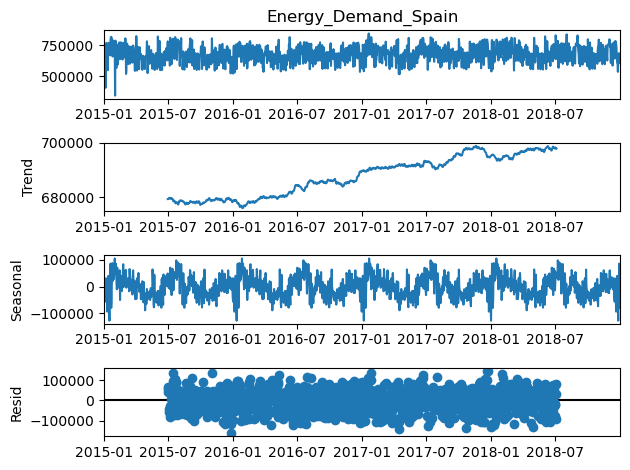

In [114]:
#Decomposicion

result=seasonal_decompose(df_dec['Energy_Demand_Spain'],period=360) 
result.plot()
pyplot.show()

In [115]:
#auto correlacion
df_dec['Energy_Demand_Spain'].autocorr()

0.35902458001377324

/Users/usuario/opt/anaconda3/envs/Nuclio/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



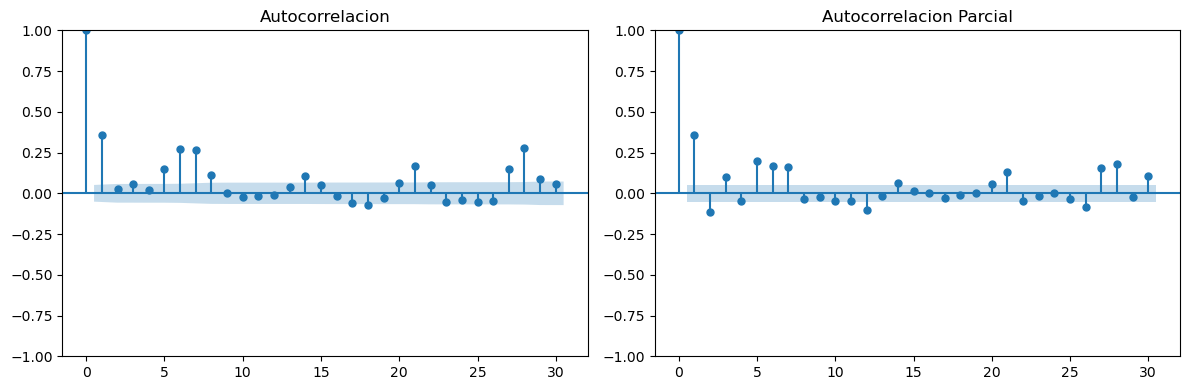

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(df_dec['Energy_Demand_Spain'], lags = 30,ax=ax1)
ax1.set_title("Autocorrelacion")

plot_pacf(df_dec['Energy_Demand_Spain'], lags = 30,ax=ax2)
ax2.set_title("Autocorrelacion Parcial")
plt.tight_layout()
plt.show()

In [117]:
#Estacionalidad

result = adfuller(df_dec['Energy_Demand_Spain'])
print('p-value: %f' % result[1])

#ES ESTACIONARIA

p-value: 0.000000


## Prophet

In [118]:
df_prophet = df_dec.reset_index().copy()
df_prophet = df_prophet.drop(['temp_med'], axis=1) #para asegurar que no coge el valor real
df_prophet = df_prophet.rename(columns={ 'Datetime' : 'ds', 'Energy_Demand_Spain': 'y' })
df_prophet['ds']=pd.to_datetime(df_prophet['ds'])
df_prophet

ds         y year_day  year  month  week_day  day week monthyear  \
0    2015-01-01  573522.0      001  2015      1         3    1   00    201501   
1    2015-01-02  654031.0      002  2015      1         4    2   00    201501   
2    2015-01-03  602656.0      003  2015      1         5    3   00    201501   
3    2015-01-04  650703.0      004  2015      1         6    4   00    201501   
4    2015-01-05  406070.0      005  2015      1         0    5   01    201501   
...         ...       ...      ...   ...    ...       ...  ...  ...       ...   
1456 2018-12-27  684773.0      361  2018     12         3   27   52    201812   
1457 2018-12-28  687306.0      362  2018     12         4   28   52    201812   
1458 2018-12-29  639282.0      363  2018     12         5   29   52    201812   
1459 2018-12-30  606334.0      364  2018     12         6   30   52    201812   
1460 2018-12-31  621534.0      365  2018     12         0   31   53    201812   

      is_holiday  temp_med_dia_anterior  
0              1                    NaN  
1              0                   7.31  
2              0                   7.47  
3              0                   8.79  
4              0                   9.75  
...          ...                    ...  
1456           0                   9.10  
1457           0                   8.50  
1458           0                   8.87  
1459           0                   8.96  
1460           0                   8.37  

[1461 rows x 11 columns]

In [119]:
df_holiday=df_spain.copy()
df_holiday=df_holiday.rename(columns={ 'Datetime' : 'ds'})
df_holiday['ds']=pd.to_datetime(df_holiday['ds'])


In [120]:
temp_p=temp.copy().rename(columns={'Datetime':'ds'})
temp_p['ds']=pd.to_datetime(temp_p['ds'])
temp_p['temp_med_dia_anterior'] =temp_p['temp_med'].shift(1) #hacemos el shift, para tner la temperatura del dia anterior, y no la real
#temp_p = temp_p.drop(['temp_med'], axis=1) #para asegurar que no coge el valor real
temp_p

ds  temp_med  temp_med_dia_anterior
0    2015-01-01      7.31                    NaN
1    2015-01-02      7.47                   7.31
2    2015-01-03      8.79                   7.47
3    2015-01-04      9.75                   8.79
4    2015-01-05      8.44                   9.75
...         ...       ...                    ...
1457 2018-12-28      8.87                   8.50
1458 2018-12-29      8.96                   8.87
1459 2018-12-30      8.37                   8.96
1460 2018-12-31      8.26                   8.37
1461 2019-01-01      7.91                   8.26

[1462 rows x 3 columns]

In [121]:
display(df_prophet.isna().sum())

ds                       0
y                        0
year_day                 0
year                     0
month                    0
week_day                 0
day                      0
week                     0
monthyear                0
is_holiday               0
temp_med_dia_anterior    1
dtype: int64

In [122]:
#solo hay el primero NA, por el shift, por lo que lo relleno con la primera temperatura conocida
df_prophet.isna().sum()
df_prophet.fillna(method="bfill", axis=0, inplace=True)

temp_p.isna().sum()
temp_p.fillna(method="bfill", axis=0, inplace=True)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


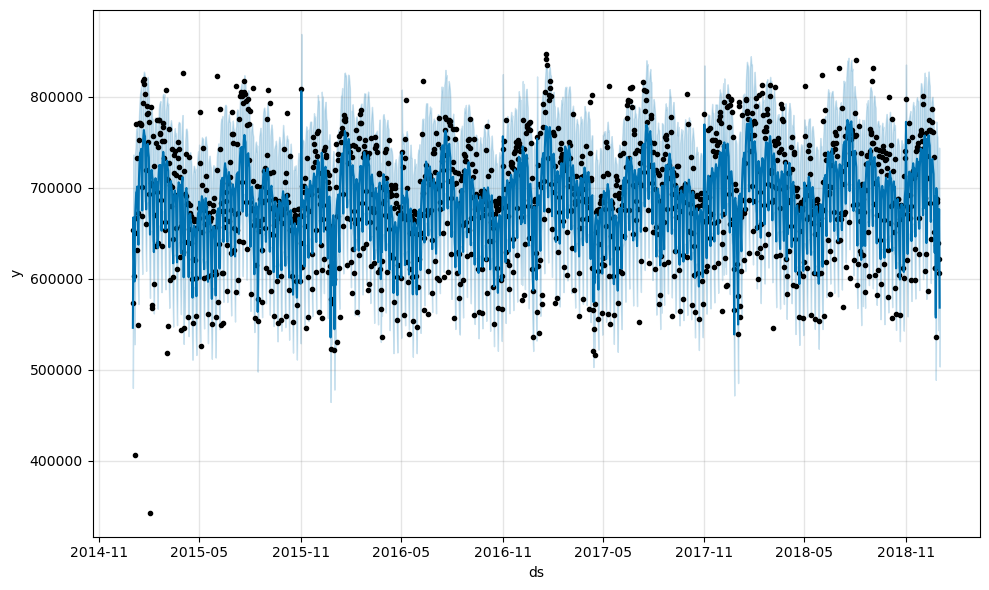

In [123]:
m_ener= Prophet( holidays=df_holiday ) #, seasonality_mode='multiplicative')
m_ener.add_regressor('temp_med_dia_anterior',mode='multiplicative')
m_ener.fit(df_prophet)
future_ener = m_ener.make_future_dataframe(1)
future_ener['temp_med_dia_anterior']=future_ener.merge(temp_p, on='ds',how='inner')['temp_med_dia_anterior']
forecast_ener = m_ener.predict(future_ener)
fig = m_ener.plot(forecast_ener)

In [124]:
plot_components_plotly(m_ener, forecast_ener)

In [125]:
prophet_final=forecast_ener[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].merge(df_prophet, on='ds',how='inner')
prophet_final=prophet_final[['ds', 'yhat', 'yhat_lower', 'yhat_upper','y']]
prophet_final

ds           yhat     yhat_lower     yhat_upper         y
0    2015-01-01  546183.925708  480045.346683  613249.587071  573522.0
1    2015-01-02  667605.726709  603635.560025  736566.705921  654031.0
2    2015-01-03  623035.854024  559149.660854  685201.780306  602656.0
3    2015-01-04  597083.232460  528056.104166  663366.091758  650703.0
4    2015-01-05  666985.747536  605971.618608  737835.479098  406070.0
...         ...            ...            ...            ...       ...
1456 2018-12-27  691888.657886  616800.247946  758520.974552  684773.0
1457 2018-12-28  688997.525193  621443.695137  755799.197244  687306.0
1458 2018-12-29  640080.802934  576572.203140  708666.126020  639282.0
1459 2018-12-30  610306.031476  543360.316985  680107.573001  606334.0
1460 2018-12-31  676633.941108  607770.729889  744108.038104  621534.0

[1461 rows x 5 columns]

In [126]:
#Funcion Error

def error(real,pred,nombre):
    print(nombre)
    print('MAE:',round(mean_absolute_error(real,pred),4))
    print('MSE:',round(mean_squared_error(real,pred),4)) 
    print('MSE_sqrt:',round(sqrt(mean_squared_error(real,pred)),4))
    print('RSCORE:',round(r2_score(real,pred),4)) 
    print('MAPE:',round(mean_absolute_percentage_error(real,pred),4),'\n') 

In [127]:
error(prophet_final['y'],prophet_final['yhat'],'Prophet:')

Prophet:
MAE: 38060.8033
MSE: 2764612541.5421
MSE_sqrt: 52579.5829
RSCORE: 0.383
MAPE: 0.057 



In [128]:
#Cross Validation

df_cv = cross_validation(m_ener,  initial='730 days', period='30 days',horizon = '1 days' )

INFO:prophet:Making 25 forecasts with cutoffs between 2017-01-09 00:00:00 and 2018-12-30 00:00:00


  0%|          | 0/25 [00:00<?, ?it/s]

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain

In [129]:
df_cv

ds           yhat     yhat_lower     yhat_upper         y  \
0  2017-01-10  735356.995719  665159.007102  801839.705201  572194.0   
1  2017-02-09  715986.971045  647539.779280  782540.715717  629493.0   
2  2017-03-11  648474.578113  575703.482643  715411.499260  685167.0   
3  2017-04-10  692232.471021  628295.333266  761709.991640  710942.0   
4  2017-05-10  702669.714964  633866.389048  773167.895136  715193.0   
5  2017-06-09  698393.371419  627446.460101  764728.350928  749317.0   
6  2017-07-09  660708.046544  590141.725933  724724.675685  740465.0   
7  2017-08-08  697632.061329  627169.559905  764109.398278  736814.0   
8  2017-09-07  714691.346225  650197.453675  784336.928473  603596.0   
9  2017-10-07  657809.674854  591017.389325  727970.269107  733817.0   
10 2017-11-06  688146.621509  619519.302439  757504.244813  614088.0   
11 2017-12-06  591892.229824  526431.391092  662858.827088  746304.0   
12 2018-01-05  703624.385733  637783.076870  772258.388304  557926.0   
13 2018-02-04  657044.495350  589143.216342  724641.951239  628615.0   
14 2018-03-06  737963.041970  671707.296889  806059.618666  546279.0   
15 2018-04-05  721570.724658  657114.173775  787179.107710  686489.0   
16 2018-05-05  661104.687256  595514.505955  728797.938680  612094.0   
17 2018-06-04  692297.741619  623373.723451  758054.843212  706622.0   
18 2018-07-04  736538.157349  667917.538986  803761.967971  642607.0   
19 2018-08-03  723617.179508  658054.460273  794948.332820  758343.0   
20 2018-09-02  656141.884468  579909.463877  725704.181988  831508.0   
21 2018-10-02  714481.607350  643205.966152  778837.888371  737029.0   
22 2018-11-01  761218.062675  691095.305352  829588.568905  797314.0   
23 2018-12-01  695817.543703  628178.942658  763040.766259  800385.0   
24 2018-12-31  678131.194938  614514.503866  743885.631105  621534.0   

       cutoff  
0  2017-01-09  
1  2017-02-08  
2  2017-03-10  
3  2017-04-09  
4  2017-05-09  
5  2017-06-08  
6  2017-07-08  
7  2017-08-07  
8  2017-09-06  
9  2017-10-06  
10 2017-11-05  
11 2017-12-05  
12 2018-01-04  
13 2018-02-03  
14 2018-03-05  
15 2018-04-04  
16 2018-05-04  
17 2018-06-03  
18 2018-07-03  
19 2018-08-02  
20 2018-09-01  
21 2018-10-01  
22 2018-10-31  
23 2018-11-30  
24 2018-12-30

In [130]:
df_cv.groupby('cutoff').size().reset_index()
df_cv['horizon'] = df_cv['ds'] - df_cv['cutoff']
df_cv['y'].between(df_cv['yhat_lower'], df_cv['yhat_upper']).mean()

0.52

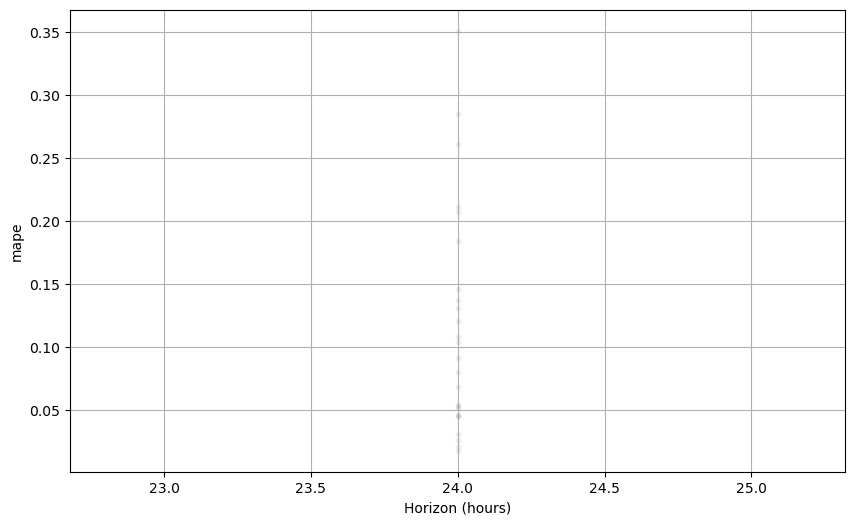

In [131]:
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window = 0)

## Boosting

In [132]:
df_boosting=df.copy()
df_boosting.fillna(method="bfill", axis=0, inplace=True)
df_boosting

Datetime  Energy_Demand_Spain year_day  year  month  week_day  day  \
0    2015-01-01             573522.0      001  2015      1         3    1   
1    2015-01-02             654031.0      002  2015      1         4    2   
2    2015-01-03             602656.0      003  2015      1         5    3   
3    2015-01-04             650703.0      004  2015      1         6    4   
4    2015-01-05             406070.0      005  2015      1         0    5   
...         ...                  ...      ...   ...    ...       ...  ...   
1456 2018-12-27             684773.0      361  2018     12         3   27   
1457 2018-12-28             687306.0      362  2018     12         4   28   
1458 2018-12-29             639282.0      363  2018     12         5   29   
1459 2018-12-30             606334.0      364  2018     12         6   30   
1460 2018-12-31             621534.0      365  2018     12         0   31   

     week monthyear  is_holiday  temp_med  temp_med_dia_anterior  
0      00    201501           1      7.31                   7.31  
1      00    201501           0      7.47                   7.31  
2      00    201501           0      8.79                   7.47  
3      00    201501           0      9.75                   8.79  
4      01    201501           0      8.44                   9.75  
...   ...       ...         ...       ...                    ...  
1456   52    201812           0      8.50                   9.10  
1457   52    201812           0      8.87                   8.50  
1458   52    201812           0      8.96                   8.87  
1459   52    201812           0      8.37                   8.96  
1460   53    201812           0      8.26                   8.37  

[1461 rows x 12 columns]

In [133]:
#funcion para añadir LAG
def lag(dat_f):
    dat_f['lag_1'] = dat_f['Energy_Demand_Spain'].shift(1)
    dat_f['lag_2'] = dat_f['Energy_Demand_Spain'].shift(2)
    dat_f['lag_3'] = dat_f['Energy_Demand_Spain'].shift(3)
    dat_f['lag_4'] = dat_f['Energy_Demand_Spain'].shift(4)
    dat_f['lag_5'] = dat_f['Energy_Demand_Spain'].shift(5)
    dat_f['lag_6'] = dat_f['Energy_Demand_Spain'].shift(6)
    dat_f['lag_7'] = dat_f['Energy_Demand_Spain'].shift(7)
    dat_f['lag_30'] = dat_f['Energy_Demand_Spain'].shift(30)
    dat_f['lag_180'] = dat_f['Energy_Demand_Spain'].shift(180)
    dat_f['lag_360'] = dat_f['Energy_Demand_Spain'].shift(360)
    return dat_f

In [134]:
df_boosting = lag(df_boosting)

In [135]:
#Division del data Frame
columns_X_b = ['Datetime','year_day', 'year','month','week_day','day','week','monthyear','is_holiday','temp_med_dia_anterior',
'lag_1','lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','lag_30','lag_180','lag_360']
columns_y_b = 'Energy_Demand_Spain'
years_train_b = np.arange(2015,2018)
years_test_b = [2018]

#df['type'] = 'No'
df_boosting.loc[df_boosting.year.isin(years_train_b), 'type'] = 'train'
df_boosting.loc[df_boosting.year.isin(years_test_b), 'type'] = 'test'

train_X_b = df_boosting[df_boosting.year.isin(years_train_b)][columns_X_b]
train_y_b = df_boosting[df_boosting.year.isin(years_train_b)][columns_y_b]
test_X_b = df_boosting[df_boosting.year.isin(years_test_b) ][columns_X_b]
test_y_b = df_boosting[df_boosting.year.isin(years_test_b) ][columns_y_b]

In [136]:
m_ener_b = CatBoostRegressor(iterations=100,
                          learning_rate=0.1,
                          depth=5)

In [137]:
# Fit model
m_ener_b.fit(train_X_b, train_y_b, verbose = False)
# Get predictions
preds_ener_b = m_ener_b.predict(test_X_b)

In [138]:
df_boosting['Energy_Demand_Spain_pred'] = np.concatenate([m_ener_b.predict(train_X_b), m_ener_b.predict(test_X_b)])

In [139]:
px.line(df_boosting.tail(31), x = 'Datetime', y = [ 'Energy_Demand_Spain', 'Energy_Demand_Spain_pred'])

In [140]:
px.line(df_boosting, x = 'Datetime', y = [ 'Energy_Demand_Spain', 'Energy_Demand_Spain_pred'], line_dash = 'type')

In [141]:
df_boosting['Energy_Demand_Spain'][1:][df_boosting[1:]['type'] == 'test']

1096    539088.0
1097    789443.0
1098    794675.0
1099    569883.0
1100    557926.0
          ...   
1456    684773.0
1457    687306.0
1458    639282.0
1459    606334.0
1460    621534.0
Name: Energy_Demand_Spain, Length: 365, dtype: float64

In [142]:
df_boosting['Energy_Demand_Spain'][1:][df_boosting[1:]['type'] == 'test']

1096    539088.0
1097    789443.0
1098    794675.0
1099    569883.0
1100    557926.0
          ...   
1456    684773.0
1457    687306.0
1458    639282.0
1459    606334.0
1460    621534.0
Name: Energy_Demand_Spain, Length: 365, dtype: float64

In [143]:
error(df_boosting['Energy_Demand_Spain'][1:][df_boosting[1:]['type'] == 'train'],df_boosting['Energy_Demand_Spain_pred'][1:][df_boosting[1:]['type'] == 'train'],'Boosting train')
error(df_boosting['Energy_Demand_Spain'][1:][df_boosting[1:]['type'] == 'test'],df_boosting['Energy_Demand_Spain_pred'][1:][df_boosting[1:]['type'] == 'test'],'Boosting test')


Boosting train
MAE: 21368.5852
MSE: 922996177.2446
MSE_sqrt: 30380.8521
RSCORE: 0.7947
MAPE: 0.0322 

Boosting test
MAE: 28142.0285
MSE: 1578777018.0901
MSE_sqrt: 39733.8271
RSCORE: 0.6328
MAPE: 0.0408 



Text(0.5, 1.0, 'Feature Importance')

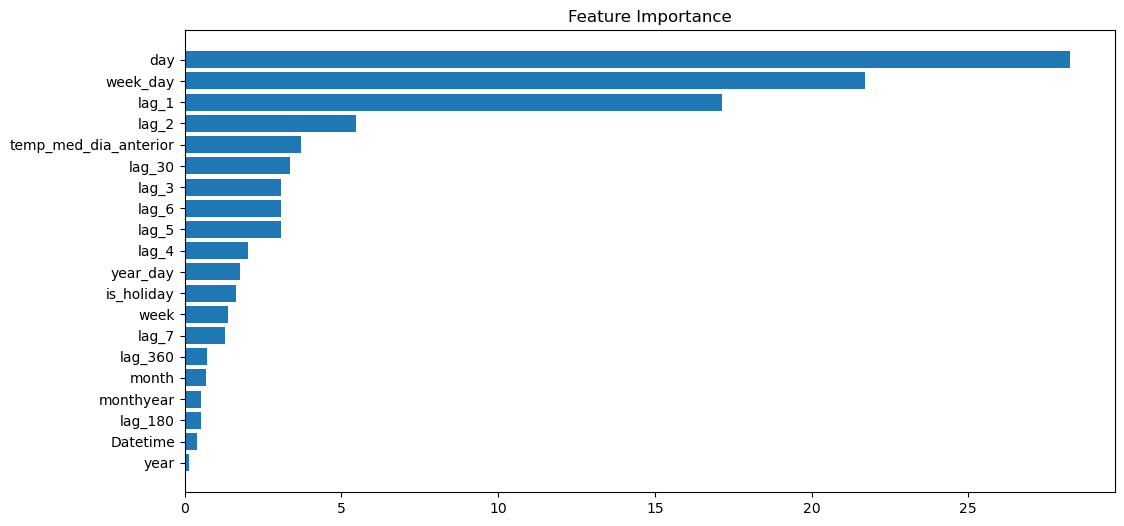

In [144]:
feature_importance_b = m_ener_b.feature_importances_
sorted_idx = np.argsort(feature_importance_b)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance_b[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(test_X_b.columns)[sorted_idx])
plt.title('Feature Importance')

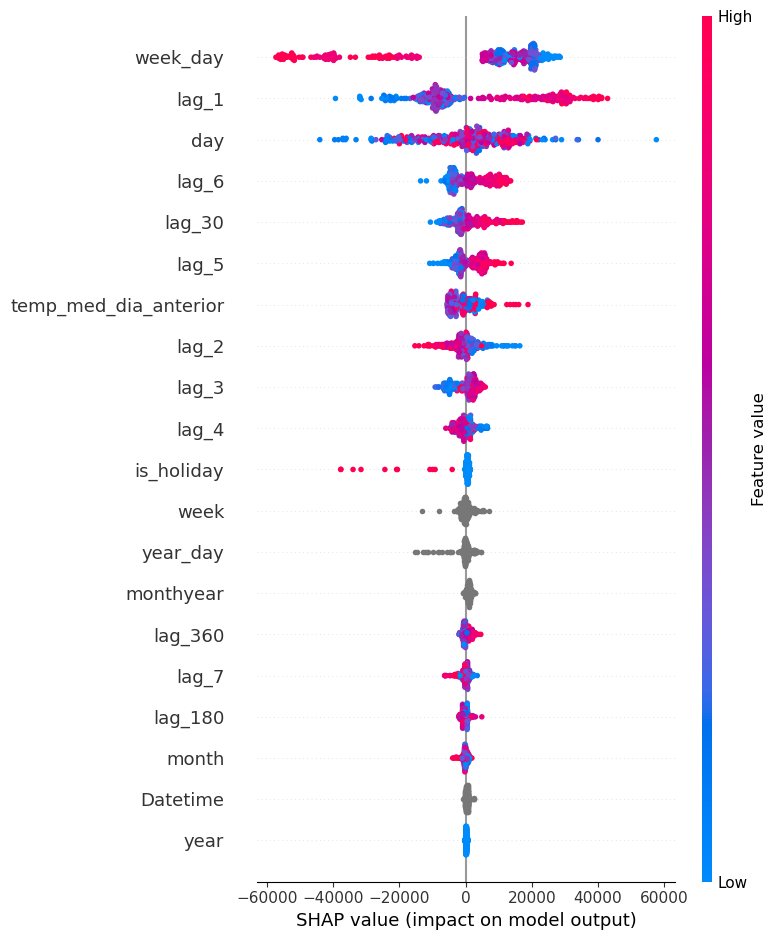

In [145]:
explainer_b= shap.TreeExplainer(m_ener_b)
shap_values_b = explainer_b.shap_values(test_X_b)
shap.summary_plot(shap_values_b, test_X_b)

In [146]:
# Boosting series con tendencia
df_boosting_ten=df.copy()
df_boosting_ten.fillna(method="bfill", axis=0, inplace=True)
df_boosting_ten


Datetime  Energy_Demand_Spain year_day  year  month  week_day  day  \
0    2015-01-01             573522.0      001  2015      1         3    1   
1    2015-01-02             654031.0      002  2015      1         4    2   
2    2015-01-03             602656.0      003  2015      1         5    3   
3    2015-01-04             650703.0      004  2015      1         6    4   
4    2015-01-05             406070.0      005  2015      1         0    5   
...         ...                  ...      ...   ...    ...       ...  ...   
1456 2018-12-27             684773.0      361  2018     12         3   27   
1457 2018-12-28             687306.0      362  2018     12         4   28   
1458 2018-12-29             639282.0      363  2018     12         5   29   
1459 2018-12-30             606334.0      364  2018     12         6   30   
1460 2018-12-31             621534.0      365  2018     12         0   31   

     week monthyear  is_holiday  temp_med  temp_med_dia_anterior  
0      00    201501           1      7.31                   7.31  
1      00    201501           0      7.47                   7.31  
2      00    201501           0      8.79                   7.47  
3      00    201501           0      9.75                   8.79  
4      01    201501           0      8.44                   9.75  
...   ...       ...         ...       ...                    ...  
1456   52    201812           0      8.50                   9.10  
1457   52    201812           0      8.87                   8.50  
1458   52    201812           0      8.96                   8.87  
1459   52    201812           0      8.37                   8.96  
1460   53    201812           0      8.26                   8.37  

[1461 rows x 12 columns]

In [147]:
df_boosting_ten = lag(df_boosting_ten)

In [148]:
df_boosting_ten['inc_per'] = (df_boosting_ten['Energy_Demand_Spain'] - df_boosting_ten['lag_1'])/df_boosting_ten['lag_1']

In [149]:
columns_X_bt = ['Datetime','year_day', 'year','month','week_day','day','week','monthyear','is_holiday','temp_med_dia_anterior','lag_1','lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','lag_30','lag_180','lag_360',
'lag_1_inc','lag_2_inc','lag_3_inc','lag_4_inc','lag_5_inc','lag_6_inc','lag_7_inc','lag_30_inc','lag_180_inc','lag_360_inc']
columns_y_bt = 'inc_per'
year_train_bt = 2017

df_boosting_ten.loc[df_boosting_ten.year <= year_train_bt, 'type'] = 'train'
df_boosting_ten.loc[df_boosting_ten.year > year_train_bt, 'type'] = 'test'


df_boosting_ten['lag_1_inc'] = df_boosting_ten['inc_per'].shift(1)
df_boosting_ten['lag_2_inc'] = df_boosting_ten['inc_per'].shift(2)
df_boosting_ten['lag_3_inc'] = df_boosting_ten['inc_per'].shift(3)
df_boosting_ten['lag_4_inc'] = df_boosting_ten['inc_per'].shift(4)
df_boosting_ten['lag_5_inc'] = df_boosting_ten['inc_per'].shift(5)
df_boosting_ten['lag_6_inc'] = df_boosting_ten['inc_per'].shift(6)
df_boosting_ten['lag_7_inc'] = df_boosting_ten['inc_per'].shift(7)
df_boosting_ten['lag_30_inc'] = df_boosting_ten['inc_per'].shift(30)
df_boosting_ten['lag_180_inc'] = df_boosting_ten['inc_per'].shift(180)
df_boosting_ten['lag_360_inc'] = df_boosting_ten['inc_per'].shift(360)

train_X_bt = df_boosting_ten[(df_boosting_ten.year <= year_train_bt) & (~df_boosting_ten[columns_y_bt].isna())][columns_X_bt]
train_y_bt = df_boosting_ten[(df_boosting_ten.year <= year_train_bt) & (~df_boosting_ten[columns_y_bt].isna())][columns_y_bt]
test_X_bt = df_boosting_ten[df_boosting_ten.year > year_train_bt ][columns_X_bt]
test_y_bt = df_boosting_ten[df_boosting_ten.year > year_train_bt ][columns_y_bt]

In [150]:
m_ener_bt = CatBoostRegressor(iterations=100,
                          learning_rate=0.1,
                          depth=5)

In [151]:
# Fit model
m_ener_bt.fit(train_X_bt, train_y_bt,verbose = False )
# Get predictions
preds = m_ener_bt.predict(test_X_bt)

In [152]:
df_boosting_ten.loc[1:,'Energ_pred_inc'] = np.concatenate([m_ener_bt.predict(train_X_bt), m_ener_bt.predict(test_X_bt)])

In [153]:
px.line(df_boosting_ten[1:], x = 'Datetime', y = [ 'inc_per', 'Energ_pred_inc'] , line_dash = 'type')

In [154]:
df_boosting_ten['Ener_pred_inc_total'] = df_boosting_ten['lag_1'] * (df_boosting_ten['Energ_pred_inc'] + 1)

In [155]:
px.line(df_boosting_ten[1:], x = 'Datetime', y = [ 'Energy_Demand_Spain', 'Ener_pred_inc_total'], line_dash = 'type')

In [156]:
error(df_boosting_ten[1:][df_boosting_ten[1:]['type'] == 'train']['Energy_Demand_Spain'],df_boosting_ten[1:][df_boosting_ten[1:]['type'] == 'train']['Ener_pred_inc_total'],'Train Boosting tendencia')
error(df_boosting_ten[1:][df_boosting_ten[1:]['type'] == 'test']['Energy_Demand_Spain'],df_boosting_ten[1:][df_boosting_ten[1:]['type'] == 'test']['Ener_pred_inc_total'],'Test Boosting tendencia')


Train Boosting tendencia
MAE: 22056.029
MSE: 1012624221.1294
MSE_sqrt: 31821.757
RSCORE: 0.7747
MAPE: 0.0333 

Test Boosting tendencia
MAE: 27948.7891
MSE: 1679835916.1677
MSE_sqrt: 40985.8014
RSCORE: 0.6093
MAPE: 0.0407 



Text(0.5, 1.0, 'Feature Importance')

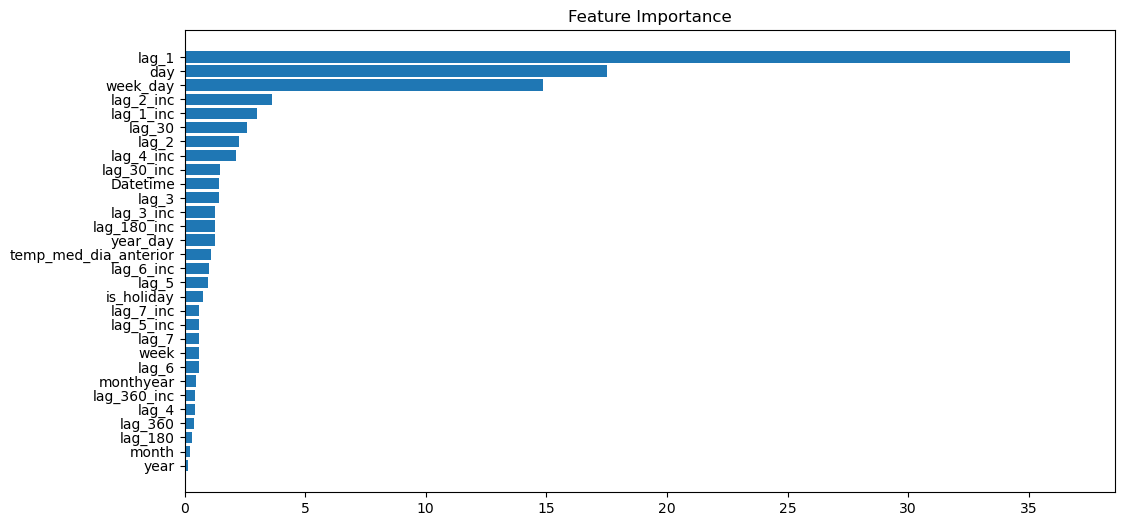

In [157]:
feature_importance_bt = m_ener_bt.feature_importances_
sorted_idx = np.argsort(feature_importance_bt)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance_bt[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(test_X_bt.columns)[sorted_idx])
plt.title('Feature Importance')

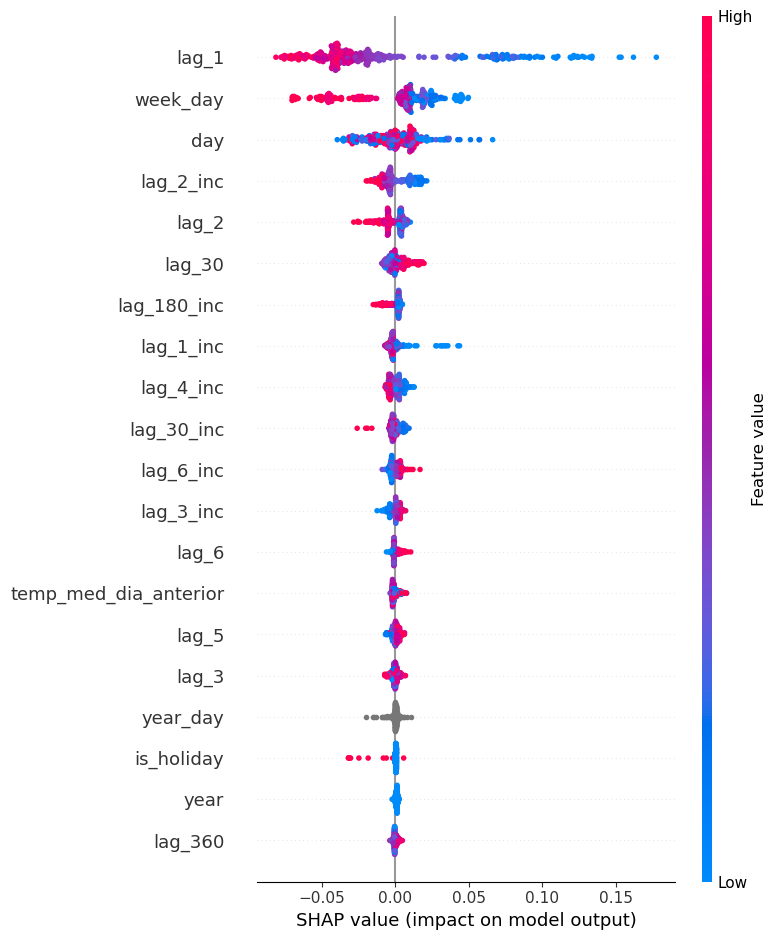

In [158]:
explainer_b_ten = shap.TreeExplainer(m_ener_bt)
shap_values_b_ten = explainer_b_ten.shap_values(test_X_bt)
shap.summary_plot(shap_values_b_ten, test_X_bt)

## Arima

In [159]:
df_arima=df.copy()
df_arima.fillna(method="bfill", axis=0, inplace=True)
df_arima

Datetime  Energy_Demand_Spain year_day  year  month  week_day  day  \
0    2015-01-01             573522.0      001  2015      1         3    1   
1    2015-01-02             654031.0      002  2015      1         4    2   
2    2015-01-03             602656.0      003  2015      1         5    3   
3    2015-01-04             650703.0      004  2015      1         6    4   
4    2015-01-05             406070.0      005  2015      1         0    5   
...         ...                  ...      ...   ...    ...       ...  ...   
1456 2018-12-27             684773.0      361  2018     12         3   27   
1457 2018-12-28             687306.0      362  2018     12         4   28   
1458 2018-12-29             639282.0      363  2018     12         5   29   
1459 2018-12-30             606334.0      364  2018     12         6   30   
1460 2018-12-31             621534.0      365  2018     12         0   31   

     week monthyear  is_holiday  temp_med  temp_med_dia_anterior  
0      00    201501           1      7.31                   7.31  
1      00    201501           0      7.47                   7.31  
2      00    201501           0      8.79                   7.47  
3      00    201501           0      9.75                   8.79  
4      01    201501           0      8.44                   9.75  
...   ...       ...         ...       ...                    ...  
1456   52    201812           0      8.50                   9.10  
1457   52    201812           0      8.87                   8.50  
1458   52    201812           0      8.96                   8.87  
1459   52    201812           0      8.37                   8.96  
1460   53    201812           0      8.26                   8.37  

[1461 rows x 12 columns]

In [160]:
years_train_a = np.arange(2015,2018)
years_test_a = [2018]

df_arima.loc[df_arima.year.isin(years_train_a), 'type'] = 'train'
df_arima.loc[df_arima.year.isin(years_test_a), 'type'] = 'test'

In [161]:
df_arima[df_arima['type']=='test']

Datetime  Energy_Demand_Spain year_day  year  month  week_day  day  \
1096 2018-01-01             539088.0      001  2018      1         0    1   
1097 2018-01-02             789443.0      002  2018      1         1    2   
1098 2018-01-03             794675.0      003  2018      1         2    3   
1099 2018-01-04             569883.0      004  2018      1         3    4   
1100 2018-01-05             557926.0      005  2018      1         4    5   
...         ...                  ...      ...   ...    ...       ...  ...   
1456 2018-12-27             684773.0      361  2018     12         3   27   
1457 2018-12-28             687306.0      362  2018     12         4   28   
1458 2018-12-29             639282.0      363  2018     12         5   29   
1459 2018-12-30             606334.0      364  2018     12         6   30   
1460 2018-12-31             621534.0      365  2018     12         0   31   

     week monthyear  is_holiday  temp_med  temp_med_dia_anterior  type  
1096   01    201801           1     10.71                  11.08  test  
1097   01    201801           0     12.28                  10.71  test  
1098   01    201801           0     13.98                  12.28  test  
1099   01    201801           0     13.89                  13.98  test  
1100   01    201801           0     11.49                  13.89  test  
...   ...       ...         ...       ...                    ...   ...  
1456   52    201812           0      8.50                   9.10  test  
1457   52    201812           0      8.87                   8.50  test  
1458   52    201812           0      8.96                   8.87  test  
1459   52    201812           0      8.37                   8.96  test  
1460   53    201812           0      8.26                   8.37  test  

[365 rows x 13 columns]

In [162]:
df_arima[df_arima['type'] == 'train'][['temp_med_dia_anterior','is_holiday']] #is_holiday

temp_med_dia_anterior  is_holiday
0                      7.31           1
1                      7.31           0
2                      7.47           0
3                      8.79           0
4                      9.75           0
...                     ...         ...
1091                   9.28           0
1092                  10.23           0
1093                  11.49           0
1094                  12.76           0
1095                  13.31           0

[1096 rows x 2 columns]

In [163]:
Sarimax_model = auto_arima(df_arima[df_arima['type'] == 'train']['Energy_Demand_Spain'],
                       #exog=df_arima[df_arima['type'] == 'train'][['temp_med_dia_anterior','is_holiday']] ,
                       start_P=1,
                       max_p=3,
                       start_q=1,
                       max_q=3,
                       m=7, #7 dias
                       seasonal=True,
                       d = 1,
                       D=1,
                       max_d = 3,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
Sarimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,1,1)[7]             : AIC=inf, Time=3.15 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=28138.696, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=27793.456, Time=0.33 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.80 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=28031.627, Time=0.18 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=27666.008, Time=2.13 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=3.09 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=27676.575, Time=0.64 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=27499.530, Time=2.05 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=27622.340, Time=0.69 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=5.03 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=2.57 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=27476.743, Time=1.95 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=27599.761, Ti

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1096
Model:             SARIMAX(2, 1, 2)x(2, 1, [], 7)   Log Likelihood              -13695.970
Date:                            Fri, 17 Feb 2023   AIC                          27405.939
Time:                                    18:33:48   BIC                          27440.884
Sample:                                         0   HQIC                         27419.166
                                           - 1096                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3733      0.136     -2.753      0.006      -0.639      -0.108
ar.L2         -0.0504      0.073     -0.694      0.487      -0.192       0.092
ma.L1         -0.1234      0.133     -0.929      0.353      -0.384       0.137
ma.L2         -0.4423      0.114     -3.881      0.000      -0.666      -0.219
ar.S.L7       -0.5990      0.036    -16.444      0.000      -0.670      -0.528
ar.S.L14      -0.3592      0.032    -11.156      0.000      -0.422      -0.296
sigma2      6.834e+09   1.02e-12   6.69e+21      0.000    6.83e+09    6.83e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                46.13
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.23
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.1e+37. Standard errors may be unstable.
"""

In [164]:
model_a = SARIMAX(df_arima[df_arima['type'] == 'train']['Energy_Demand_Spain'],order=(2, 1, 2),
              #exog= df_arima[df_arima['type'] == 'train'][['temp_med_dia_anterior','is_holiday']] ,  
              seasonal_order=(2, 1,[] , 7),
              enforce_stationarity=False,
              enforce_invertibility=False)
results_a = model_a.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23029D+01    |proj g|=  9.09756D-02


 This problem is unconstrained.



At iterate    5    f=  1.22921D+01    |proj g|=  3.58346D-03

At iterate   10    f=  1.22908D+01    |proj g|=  1.85479D-02

At iterate   15    f=  1.22903D+01    |proj g|=  1.09367D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     18      1     0     0   1.094D-04   1.229D+01
  F =   12.290298587149550     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


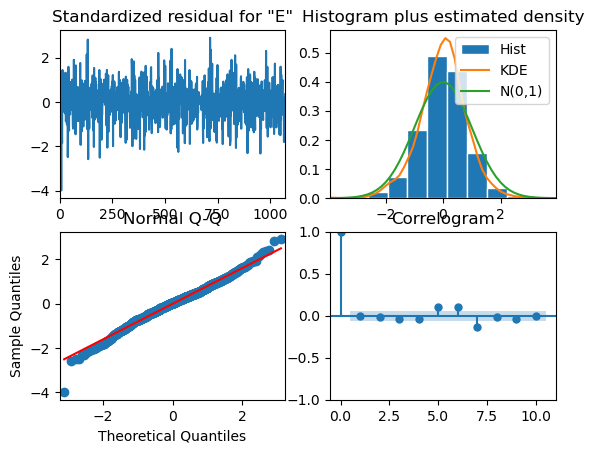

In [165]:
results_a.plot_diagnostics()
plt.show()

In [166]:
df_arima['prediction_dynamic'] = results_a.predict(start = 0, end = len(df_arima)-1 )#,exog=df_arima[df_arima['type'] == 'test'][['temp_med_dia_anterior','is_holiday']]   ) 

In [167]:
results_step = results_a.append(df_arima[df_arima['type'] == 'test']['Energy_Demand_Spain'])# ,exog=df_arima[df_arima['type'] == 'test'][['temp_med_dia_anterior','is_holiday']]   ) 

In [168]:
df_arima['prediction_step'] = results_step.predict(end = df_arima.shape[0])

In [169]:
results_step_refit = results_a.append(df_arima[df_arima['type'] == 'test']['Energy_Demand_Spain']) #, exog=df_arima[df_arima['type'] == 'test'][['temp_med_dia_anterior','is_holiday']]  ,refit = True) #se reentrena con el ultimo valor

In [170]:
df_arima['prediction_step_refit'] = results_step_refit.predict(end = df.shape[0])

In [171]:
px.line(df_arima,x='Datetime',y=['Energy_Demand_Spain','prediction_step_refit', 'prediction_dynamic', 'prediction_step'])

In [172]:
error(df_arima[df_arima['type'] == 'test']['Energy_Demand_Spain'],df_arima[df_arima['type'] == 'test']['prediction_step'],'TEST Prediction Step')
error(df_arima[df_arima['type'] == 'test']['Energy_Demand_Spain'],df_arima[df_arima['type'] == 'test']['prediction_step_refit'],'TEST Prediction Step Refit')
error(df_arima[df_arima['type'] == 'test']['Energy_Demand_Spain'],df_arima[df_arima['type'] == 'test']['prediction_dynamic'],'TEST Prediction Dinamic')

TEST Prediction Step
MAE: 49724.0511
MSE: 4406997527.1259
MSE_sqrt: 66385.2207
RSCORE: -0.025
MAPE: 0.0725 

TEST Prediction Step Refit
MAE: 49724.0511
MSE: 4406997527.1259
MSE_sqrt: 66385.2207
RSCORE: -0.025
MAPE: 0.0725 

TEST Prediction Dinamic
MAE: 653126.8593
MSE: 552239244428.0172
MSE_sqrt: 743128.0135
RSCORE: -127.4393
MAPE: 0.9421 



## Conclusion

In [173]:
#comparacion de predicciones 2018
arima_t=df_arima.rename(columns={'prediction_step_refit' : 'ARIMA_prediction_step_refit' ,'prediction_dynamic' : 'ARIMA_prediction_dynamic' ,  'prediction_step' : 'ARIMA_prediction_step' })
prophet_t= prophet_final.rename(columns={'yhat':'PROPHET','ds' : 'Datetime' , }) 
boosting_tt=df_boosting_ten.rename(columns={'Ener_pred_inc_total':'BOOSTING_tendencia' }) 
boosting_t=df_boosting.rename(columns= {'Energy_Demand_Spain_pred':'BOOSTING_standard'})

In [174]:
total_pred=boosting_tt[boosting_tt['type'] == 'test'][['Datetime','Energy_Demand_Spain','BOOSTING_tendencia']].merge(boosting_t[['Datetime','BOOSTING_standard']],on='Datetime',how='inner').merge(prophet_t[['Datetime','PROPHET']] , on= 'Datetime', how='inner').merge(arima_t[['Datetime','ARIMA_prediction_step_refit','ARIMA_prediction_dynamic','ARIMA_prediction_step']] , on='Datetime', how='inner')
total_pred

Datetime  Energy_Demand_Spain  BOOSTING_tendencia  BOOSTING_standard  \
0   2018-01-01             539088.0       692986.804381      636456.741696   
1   2018-01-02             789443.0       661119.809159      721337.369035   
2   2018-01-03             794675.0       749358.403962      727237.034844   
3   2018-01-04             569883.0       676342.088030      671667.160226   
4   2018-01-05             557926.0       631487.006829      639279.314220   
..         ...                  ...                 ...                ...   
360 2018-12-27             684773.0       689274.343042      668481.987017   
361 2018-12-28             687306.0       688858.409064      683158.742170   
362 2018-12-29             639282.0       641533.435890      621151.631581   
363 2018-12-30             606334.0       601605.281463      582687.968552   
364 2018-12-31             621534.0       686387.552317      660954.317815   

           PROPHET  ARIMA_prediction_step_refit  ARIMA_prediction_dynamic  \
0    549744.959906                592934.013968             592934.013968   
1    683241.228002                666634.573175             690395.066127   
2    691656.632880                764639.284678             716379.644896   
3    689892.334453                717534.855399             705239.489937   
4    693590.788677                640035.945468             681597.671786   
..             ...                          ...                       ...   
360  691888.657886                692356.387763            -503834.725743   
361  688997.525193                663620.482766            -527563.656326   
362  640080.802934                587596.301780            -598926.617634   
363  610306.031476                615013.342523            -639974.482964   
364  676633.941108                570453.497808            -623280.960854   

     ARIMA_prediction_step  
0            592934.013968  
1            666634.573175  
2            764639.284678  
3            717534.855399  
4            640035.945468  
..                     ...  
360          692356.387763  
361          663620.482766  
362          587596.301780  
363          615013.342523  
364          570453.497808  

[365 rows x 8 columns]

In [175]:
px.line(total_pred,x='Datetime',y=['Energy_Demand_Spain','BOOSTING_tendencia','BOOSTING_standard','PROPHET','ARIMA_prediction_step_refit','ARIMA_prediction_dynamic','ARIMA_prediction_step'])

In [176]:
df_errores = pd.DataFrame({
    'Modelo': ['PROPHET','BOOSTING_standard','BOOSTING_tendencia','ARIMA_pprediction_dynamic', 'ARIMA_prediction_step_refit', 'ARIMA_prediction_step'], 
    'MAPE': [mean_absolute_percentage_error(prophet_final['y'], prophet_final['yhat']), 
    mean_absolute_percentage_error(df_boosting['Energy_Demand_Spain'][1:][df_boosting[1:]['type'] == 'test'],df_boosting['Energy_Demand_Spain_pred'][1:][df_boosting[1:]['type'] == 'test']),
    mean_absolute_percentage_error(df_boosting_ten[df_boosting_ten['type'] == 'test']['Energy_Demand_Spain'], df_boosting_ten[df_boosting_ten['type'] == 'test']['Ener_pred_inc_total']),
    mean_absolute_percentage_error(df_arima['Energy_Demand_Spain'], df_arima['prediction_step_refit']),
    mean_absolute_percentage_error(df_arima['Energy_Demand_Spain'], df_arima['prediction_dynamic']),
    mean_absolute_percentage_error(df_arima['Energy_Demand_Spain'], df_arima['prediction_step'])

    ]})

df_errores    

Modelo      MAPE
0                      PROPHET  0.057047
1            BOOSTING_standard  0.040821
2           BOOSTING_tendencia  0.040749
3    ARIMA_pprediction_dynamic  0.077866
4  ARIMA_prediction_step_refit  0.295103
5        ARIMA_prediction_step  0.077866

In [177]:
px.bar(df_errores,x='Modelo',y='MAPE')

## Modelo elejido

Tanto el Boster Standard como el Booster tendencia tiene el mismo error: 4,08%, se opto por el standart , ya que tiene menos calculos

In [178]:
#Añadir el dia a predecir, añadir todas las variables PRESENTES
dia_a_predecir = {'Datetime': '2019-01-01'}

# agrega la nueva línea al dataframe utilizando el método append()
pred_df = df_boosting.append(dia_a_predecir, ignore_index=True)

pred_df['Datetime']= pd.to_datetime(pred_df['Datetime'])

#llamar a las funciones de tiempo y festivos
pred_df=metricas_tiempo(pred_df)
pred_df=add_festivos(pred_df)
pred_df = lag(pred_df)

#añadir la temperatura del dia anterior
pred_df['temp_med_dia_anterior'] =pred_df['Datetime'].map(temp.set_index('Datetime')['temp_med'].shift()).fillna(temp['temp_med'])

/var/folders/_c/hk8dlkj51473mmsqx14j1p9w0000gn/T/ipykernel_12712/4001510124.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [179]:
#Temperatura a predecir, donde Energy_Demand_Spain es NA (no sabemos la real)
columnas=['Datetime','year_day', 'year','month','week_day','day','week','monthyear','is_holiday','temp_med_dia_anterior',
'lag_1','lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','lag_30','lag_180','lag_360']
prediccion = pd.DataFrame({
    'Datetime' : pred_df[pred_df.Energy_Demand_Spain.isna()]['Datetime'],
    'Energia_Predecida' : m_ener_b.predict(pred_df[pred_df.Energy_Demand_Spain.isna()][columnas])
    }).reset_index()
prediccion

index   Datetime  Energia_Predecida
0   1461 2019-01-01      648325.014513